## SIMPLE EXPONENTIAL SMOOTHING — FULL WORKING CODE

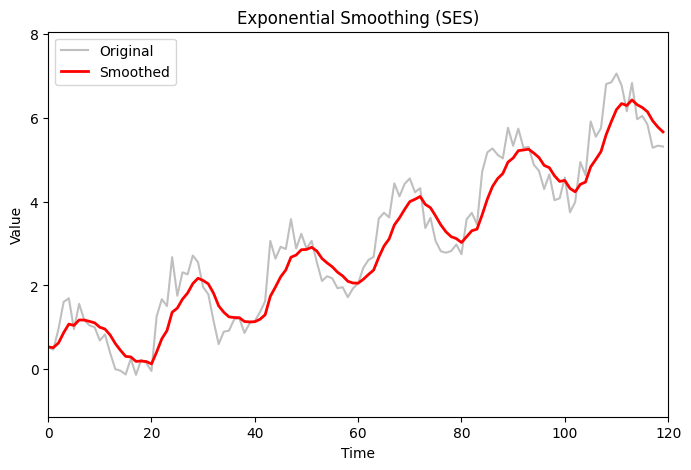

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

# ----------------------------------
# Create output folder
# ----------------------------------
os.makedirs("gifs", exist_ok=True)

# ----------------------------------
# Generate time series
# ----------------------------------
np.random.seed(0)
t = np.arange(120)
series = 0.05 * t + np.sin(0.3 * t) + np.random.normal(0, 0.3, len(t))

# ----------------------------------
# Exponential Smoothing
# ----------------------------------
alpha = 0.25   # smoothing factor

smoothed = []
s = series[0]
for i in range(len(series)):
    s = alpha * series[i] + (1 - alpha) * s
    smoothed.append(s)

# ----------------------------------
# Plot setup
# ----------------------------------
fig, ax = plt.subplots(figsize=(8, 5))

line_data, = ax.plot(series, color="gray", alpha=0.5, label="Original")
line_smooth, = ax.plot([], [], color="red", linewidth=2, label="Smoothed")

ax.set_title("Exponential Smoothing (SES)")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.legend()

# ----------------------------------
# Animation
# ----------------------------------
writer = PillowWriter(fps=3)

with writer.saving(fig, "gifs/exponential_smoothing.gif", dpi=120):
    for i in range(len(series)):
        line_smooth.set_data(range(i + 1), smoothed[: i + 1])
        ax.set_xlim(0, len(series))
        ax.set_ylim(series.min() - 1, series.max() + 1)
        writer.grab_frame()

plt.show()
